## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
import seaborn as sns

In [5]:
plt.style.use('fivethirtyeight')

## Reading the dataset and observing the dataset

In [6]:
data=pd.read_csv('../dataset/Seethaeliya1.csv')
##importing the data

In [7]:
data.head()
##watching head values of dataset

,Date,T_Max,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
0,1/1/2016,16.8,12.4,100.0,98.0,13.75,0.0,8.5,1.16
1,1/2/2016,16.2,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2,1/3/2016,18.8,12.0,92.0,98.0,5.92,5.8,0.0,1.58
3,1/4/2016,19.8,12.6,94.0,94.0,4.63,7.1,0.0,1.84
4,1/5/2016,20.2,14.8,96.0,74.0,5.52,10.4,0.2,1.47


In [8]:
data.shape
##the shape of the dataset

(2192, 9)

In [9]:
##showing the datatypes
data.dtypes

Date               object
T_Max              object
T_Min             float64
RH_1              float64
RH_2              float64
Wind_speed        float64
sunshine_hours    float64
rainfall          float64
evaporation       float64
dtype: object

In [10]:
##converting date and time
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.dtypes

Date              datetime64[ns]
T_Max                     object
T_Min                    float64
RH_1                     float64
RH_2                     float64
Wind_speed               float64
sunshine_hours           float64
rainfall                 float64
evaporation              float64
dtype: object

In [13]:
data.apply(pd.isnull).sum()

Date                0
T_Max             560
T_Min              87
RH_1               86
RH_2               85
Wind_speed         57
sunshine_hours     57
rainfall           54
evaporation        57
dtype: int64

In [14]:
##showing the impact of null values by percentage
data.apply(pd.isnull).sum()/data.shape[0]*100

Date               0.000000
T_Max             25.547445
T_Min              3.968978
RH_1               3.923358
RH_2               3.877737
Wind_speed         2.600365
sunshine_hours     2.600365
rainfall           2.463504
evaporation        2.600365
dtype: float64

Text(0, 0.5, 'Features')

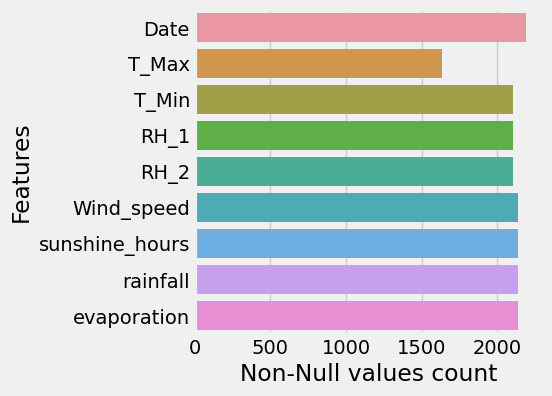

In [15]:
##showing the impact of null values graphically
plt.figure(figsize=(4,4))
sns.barplot(x=data.count()[:],y=data.count().index)
plt.xlabel('Non-Null values count')
plt.ylabel('Features')

In [16]:
##We will need to remove the T_max feature because there are so much null values
##remove the T_Max column
data=data.drop(['T_Max'],axis=1)

In [17]:
data.head()
##dataset after removing the T_Max column

,Date,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
0,2016-01-01,12.4,100.0,98.0,13.75,0.0,8.5,1.16
1,2016-01-02,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2,2016-01-03,12.0,92.0,98.0,5.92,5.8,0.0,1.58
3,2016-01-04,12.6,94.0,94.0,4.63,7.1,0.0,1.84
4,2016-01-05,14.8,96.0,74.0,5.52,10.4,0.2,1.47


In [18]:
data.apply(pd.isnull).sum()/data.shape[0]*100
##showing the null values of dataset after removing the T_Max column

Date              0.000000
T_Min             3.968978
RH_1              3.923358
RH_2              3.877737
Wind_speed        2.600365
sunshine_hours    2.600365
rainfall          2.463504
evaporation       2.600365
dtype: float64

In [19]:
from scipy.interpolate import interp1d

In [20]:
data=data.interpolate() ##handle null values with linear interpolation

In [21]:
##checking whether there are null values
data.apply(pd.isnull).sum()/data.shape[0]

Date              0.0
T_Min             0.0
RH_1              0.0
RH_2              0.0
Wind_speed        0.0
sunshine_hours    0.0
rainfall          0.0
evaporation       0.0
dtype: float64

In [22]:
##copy original data set to another variable before indexing
df=data.copy()

In [23]:
data.set_index('Date',inplace=True)

In [24]:
data.head()

,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
Date,,,,,,,
2016-01-01,12.4,100.0,98.0,13.75,0.0,8.5,1.16
2016-01-02,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2016-01-03,12.0,92.0,98.0,5.92,5.8,0.0,1.58
2016-01-04,12.6,94.0,94.0,4.63,7.1,0.0,1.84
2016-01-05,14.8,96.0,74.0,5.52,10.4,0.2,1.47


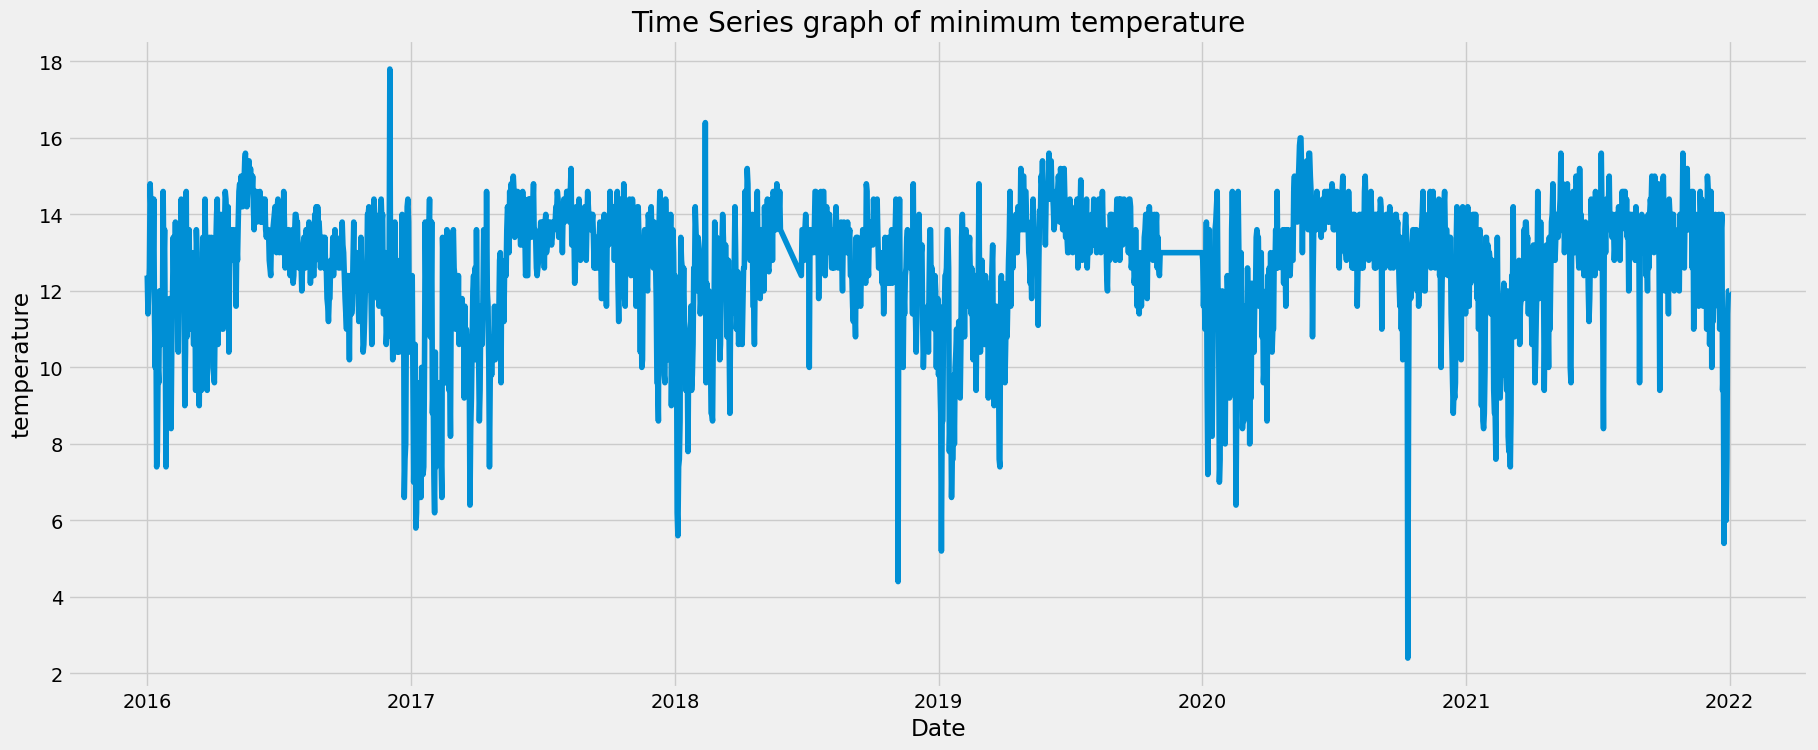

In [25]:
##time series plot of minimum temperature
plt.figure(figsize=(20,8))
plt.plot(data['T_Min'])
plt.title('Time Series graph of minimum temperature')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

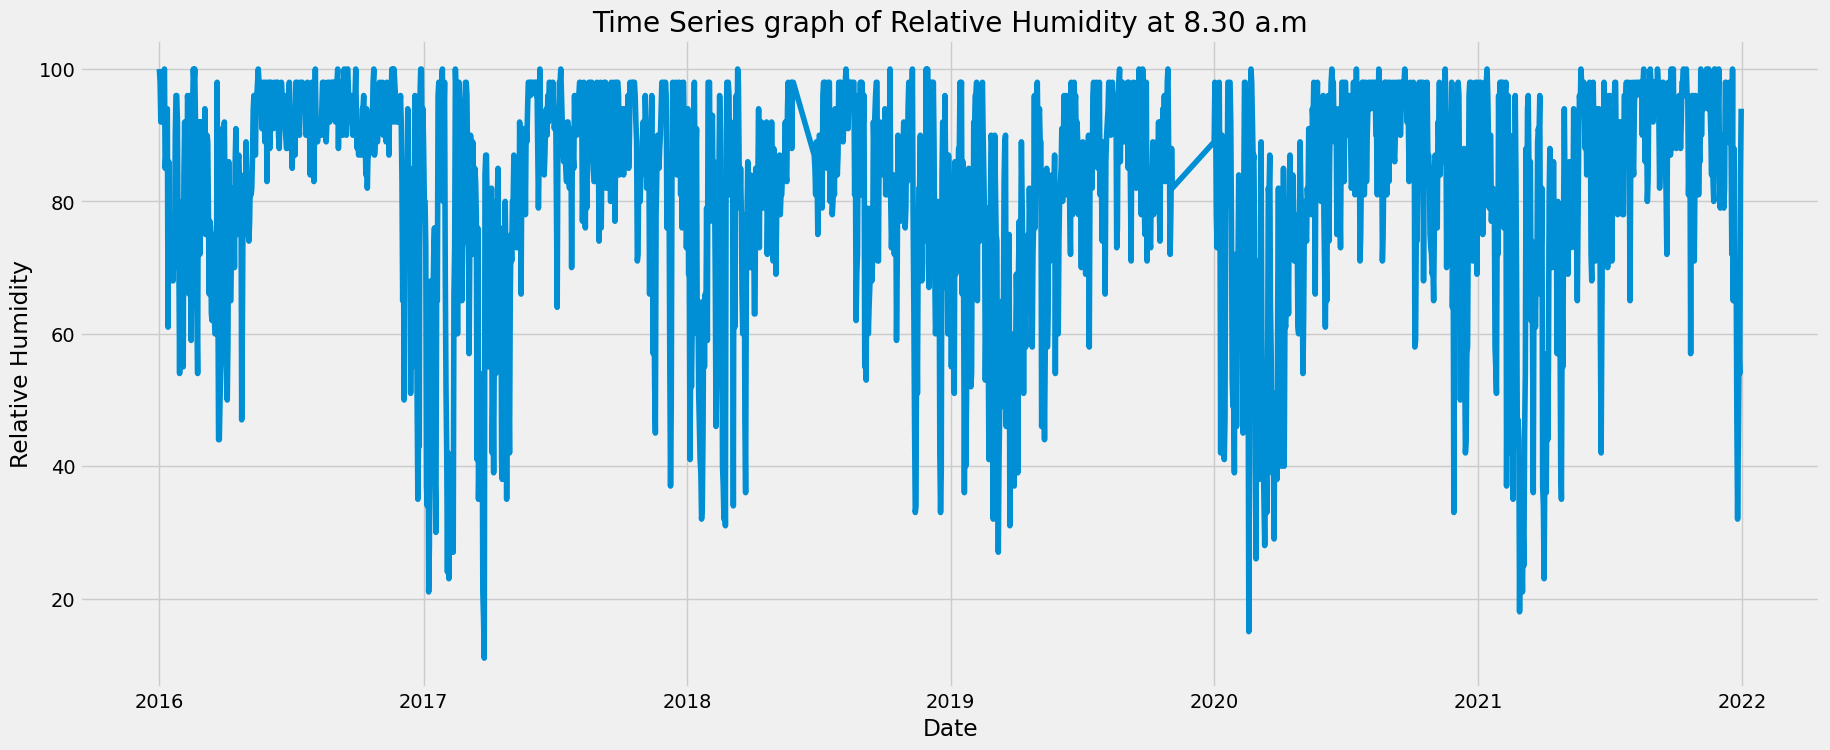

In [29]:
##time series plot of minimum rh1
plt.figure(figsize=(20,8))
plt.plot(data['RH_1'])
plt.title('Time Series graph of Relative Humidity at 8.30 a.m')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.show()

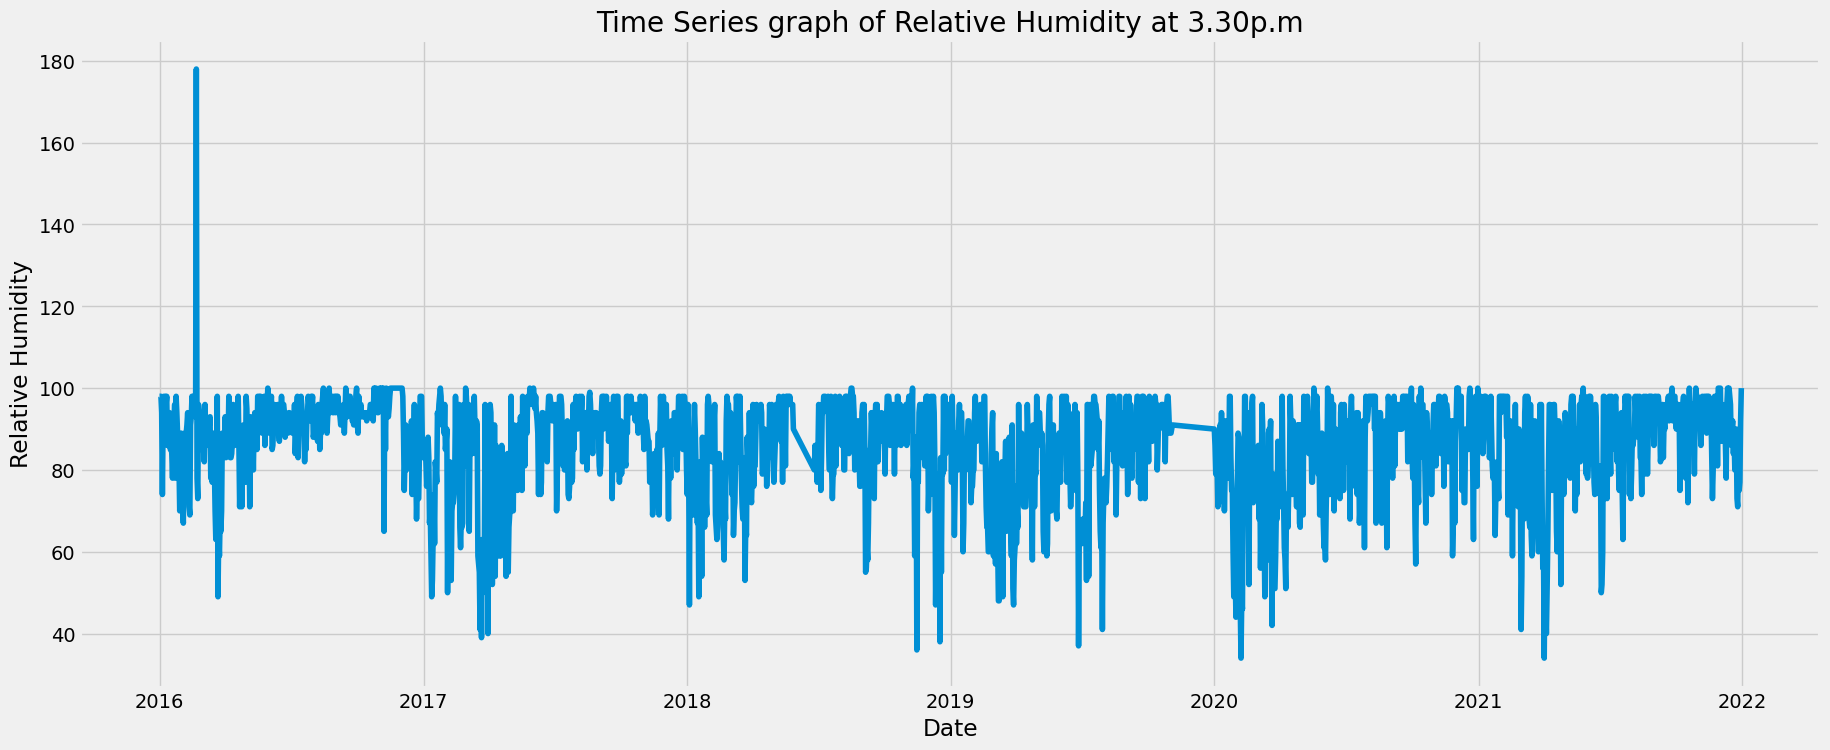

In [27]:
##time series plot of minimum rh2
plt.figure(figsize=(20,8))
plt.plot(data['RH_2'])
plt.title('Time Series graph of Relative Humidity at 3.30p.m')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.show()

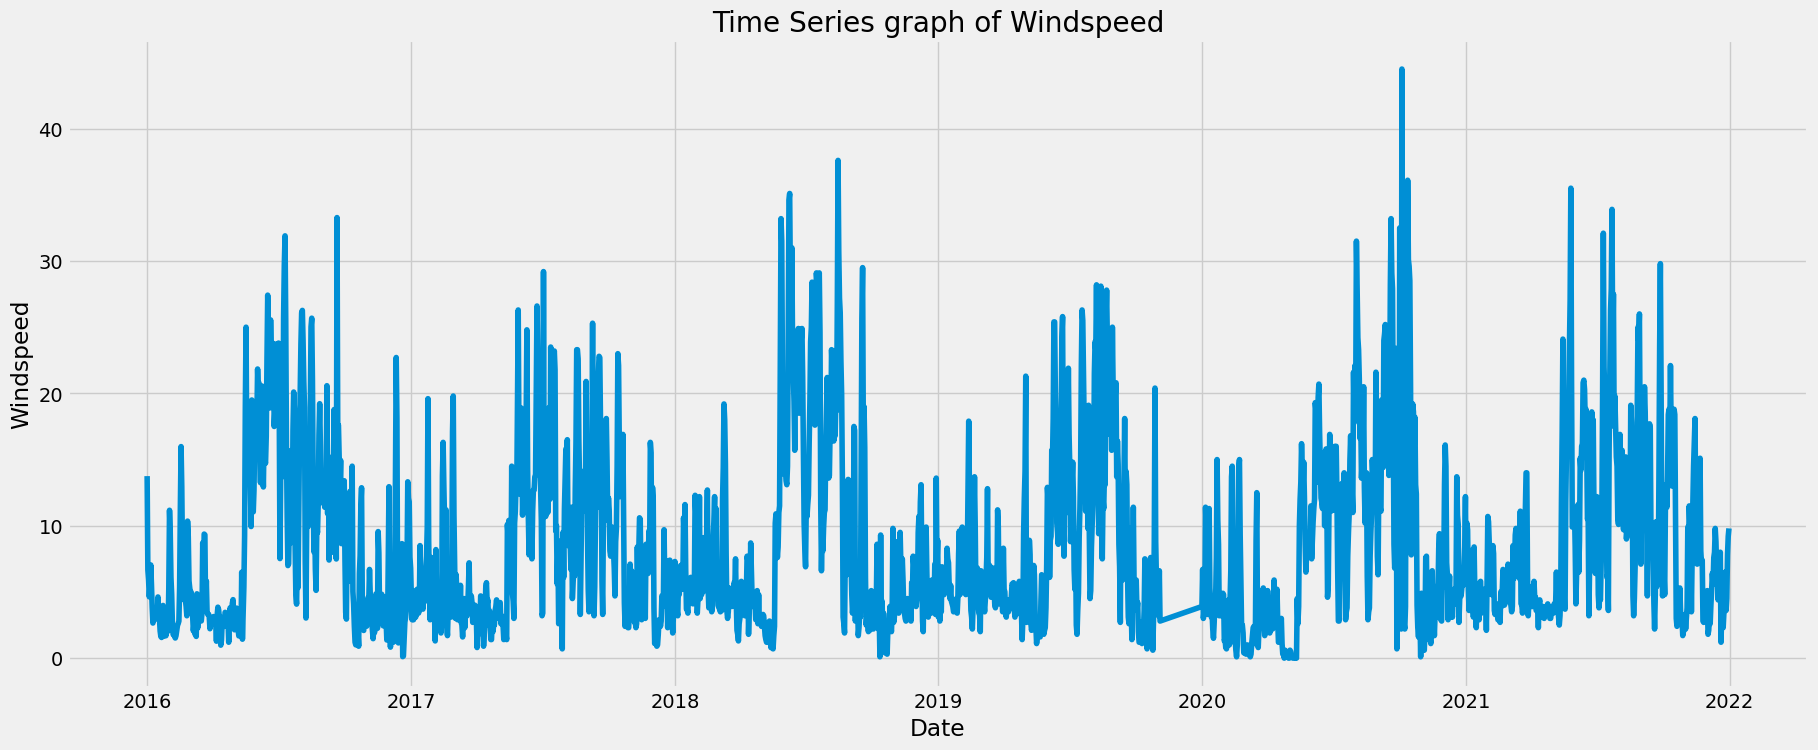

In [28]:
##time series plot of windspeed
plt.figure(figsize=(20,8))
plt.plot(data['Wind_speed'])
plt.title('Time Series graph of Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.show()

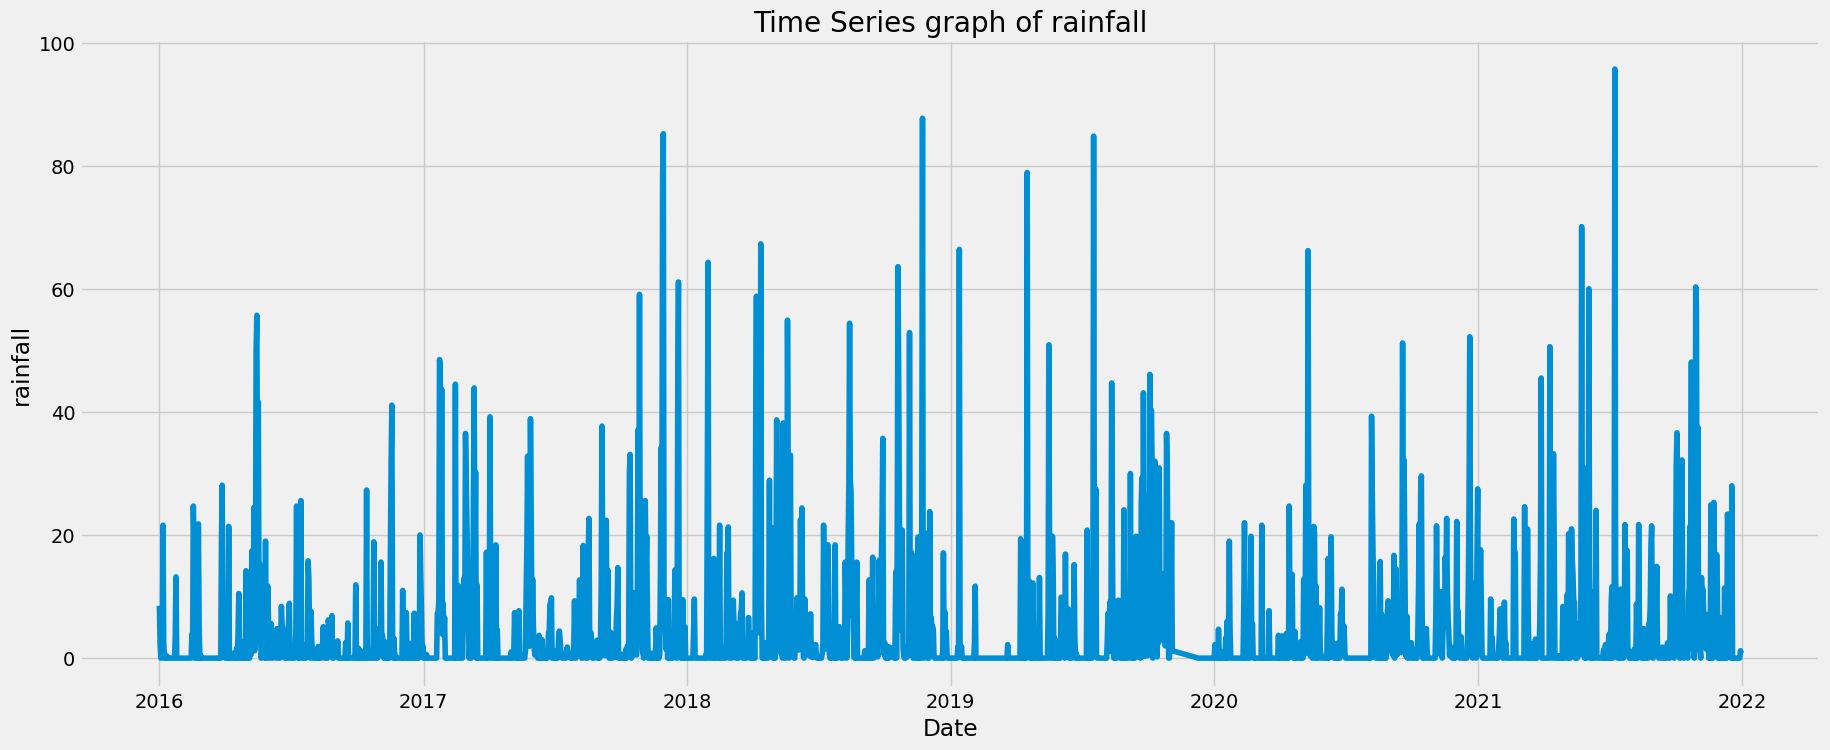

In [28]:
##time series plot of rainfall
plt.figure(figsize=(20,8))
plt.plot(data['rainfall'])
plt.title('Time Series graph of rainfall')
plt.xlabel('Date')
plt.ylabel('rainfall')
plt.show()

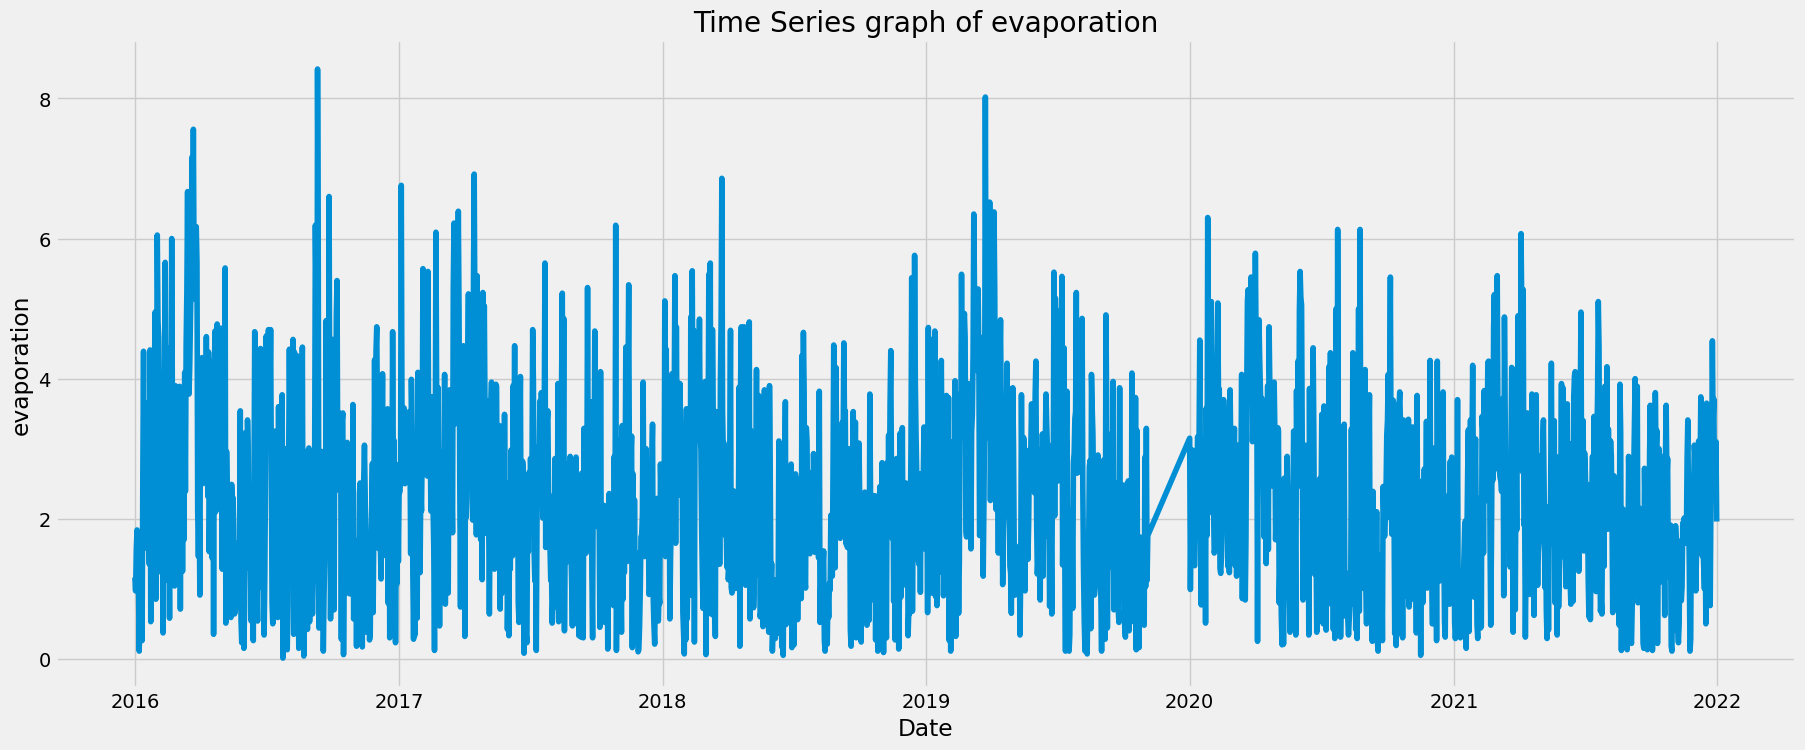

In [30]:
##time series plot of rainfall
plt.figure(figsize=(20,8))
plt.plot(data['evaporation'])
plt.title('Time Series graph of evaporation')
plt.xlabel('Date')
plt.ylabel('evaporation')
plt.show()

## Data Preprocessing To Build the LSTM model for minimum Temperature

In [30]:
##create a new dataframe with only the T_Min column
data1=data.filter(['T_Min'])
##convert the dataframe into a numpy array
dataset1=data1.values
##get the number of rows to train the model
train_data_len=math.ceil(len(dataset1)*.8)

train_data_len


1754

In [31]:
##Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
sc=scaler.fit_transform(dataset1)
sc

array([[0.64935065],
       [0.58441558],
       [0.62337662],
       ...,
       [0.58441558],
       [0.62337662],
       [0.62337662]])

In [32]:
#Create the training data set
##create the scaled training data set
train_data=sc[0:train_data_len,:]
##split the data into x_train and y_train data sets

x_train=[] ##features
y_train=[] ##target

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.64935065, 0.58441558, 0.62337662, 0.66233766, 0.80519481,
       0.76623377, 0.72727273, 0.66233766, 0.66233766, 0.77922078,
       0.58441558, 0.49350649, 0.58441558, 0.32467532, 0.35064935,
       0.49350649, 0.46753247, 0.62337662, 0.53246753, 0.62337662,
       0.53246753, 0.57142857, 0.79220779, 0.66233766, 0.72727273,
       0.51948052, 0.32467532, 0.50649351, 0.49350649, 0.45454545,
       0.54545455, 0.61038961, 0.42857143, 0.38961039, 0.53246753,
       0.61038961, 0.71428571, 0.63636364, 0.58441558, 0.74025974,
       0.58441558, 0.5974026 , 0.61038961, 0.51948052, 0.63636364,
       0.5974026 , 0.62337662, 0.77922078, 0.71428571, 0.71428571,
       0.62337662, 0.64935065, 0.42857143, 0.51948052, 0.79220779,
       0.54545455, 0.67532468, 0.57142857, 0.72727273, 0.61038961])]
[0.5584415584415584]



In [33]:
##convert train sets to numpyarrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train
y_train
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0.55844156, 0.58441558, 0.68831169, ..., 0.62337662, 0.7012987 ,
       0.72727273])

In [34]:
##reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1694, 60, 1)

## Build The LSTM model for Minimum Temperature

In [344]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,activation='relu',return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))

In [346]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [347]:
##train the model
history = model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
1694/1694 [==============================] - 36s 20ms/step - loss: 0.0133
Epoch 2/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0085
Epoch 3/10
1694/1694 [==============================] - 33s 19ms/step - loss: 0.0083
Epoch 4/10
1694/1694 [==============================] - 33s 19ms/step - loss: 0.0076
Epoch 5/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0072
Epoch 6/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0069
Epoch 7/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0067
Epoch 8/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0065
Epoch 9/10
1694/1694 [==============================] - 34s 20ms/step - loss: 0.0065
Epoch 10/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0066


Text(0.5, 1.0, 'Model Accuracy')

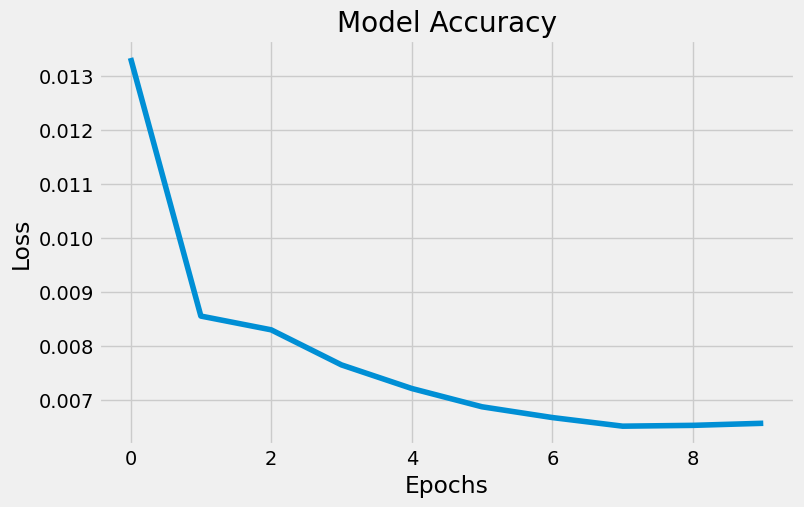

In [348]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [349]:
##create the testing dataset
##create a new array containing scaled values from index 1694 to 2192
test_data=sc[train_data_len-60:,:]
##Create data set x_test and y_test
x_test=[]
y_test=dataset1[train_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [350]:
##convert the data into numpy array
x_test=np.array(x_test)

In [351]:
##reshape the dataset
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [352]:
##get the models predicted temperatures
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) ##unscaling



14/14 [==============================] - 1s 17ms/step


In [353]:
##calculate RMSE
##lower the RMSE higher the accuracy
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

1.298351692893802

C:\Users\Chalaka\AppData\Local\Temp\ipykernel_16032\3541718220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Predictions']=predictions


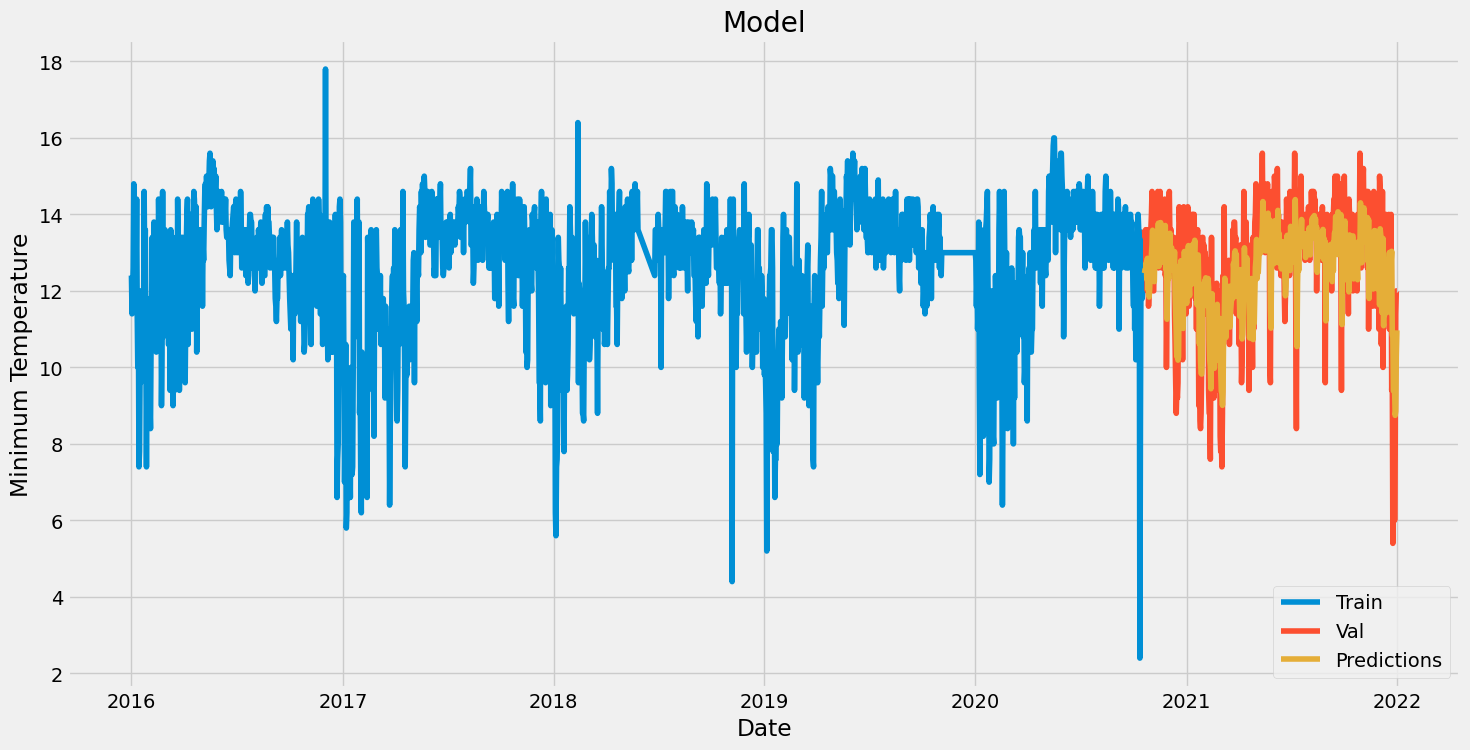

In [354]:
##plot the data
train=data1[:train_data_len]
validation_data=data1[train_data_len:]
validation_data['Predictions']=predictions

##visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.plot(train['T_Min'])
plt.plot(validation_data[['T_Min','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

## Prediction for the next day Minimum temperature

In [356]:
##get the quote
data1_quote=pd.read_csv('../dataset/Seethaeliya1.csv')

In [357]:
data1_quote.set_index('Date',inplace=True)

In [358]:
##create a new dataframe
new_data1=data1_quote.filter(['T_Min'])
##get the last 60 day minimum temperature and convert the dataframe to an array
last_60=new_data1[-60:].values
##scale the data between 0 and 1
sc_last_60=scaler.transform(last_60)
##Create an empty list
X_test=[]
##Append the past days
X_test.append(sc_last_60)
##convert the X_test data to numpy array
X_test=np.array(X_test)
##reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
##Get the predicted scaled minimum temperature
pred_temp=model.predict(X_test)
##undo the scaling
pred_temp=scaler.inverse_transform(pred_temp)
print(pred_temp) ##minimum temperature for 2022-01-01

1/1 [==============================] - 0s 47ms/step
[[11.158023]]


In [203]:
##actual T_Min value = 14.6

In [295]:
##create a new dataframe with only the T_Min column
data3=data.filter(['RH_2'])
##convert the dataframe into a numpy array
dataset3=data3.values
##get the number of rows to train the model
train_data_len2=math.ceil(len(dataset3)*.8)

train_data_len2

1754

In [296]:
##Scaling the data
scaler2=MinMaxScaler(feature_range=(0,1))
sc2=scaler2.fit_transform(dataset3)
sc2

array([[0.44444444],
       [0.44444444],
       [0.44444444],
       ...,
       [0.29861111],
       [0.40277778],
       [0.45833333]])

In [297]:
#Create the training data set
##create the scaled training data set
train_data2=sc2[0:train_data_len2,:]
##split the data into x_train and y_train data sets

x_train2=[] ##features
y_train2=[] ##target

for i in range(60,len(train_data2)):
    x_train2.append(train_data2[i-60:i,0])
    y_train2.append(train_data2[i,0])
    if i<=60:
        print(x_train2)
        print(y_train2)
        print()

[array([0.44444444, 0.44444444, 0.44444444, 0.41666667, 0.27777778,
       0.40277778, 0.44444444, 0.44444444, 0.44444444, 0.43055556,
       0.44444444, 0.36111111, 0.36805556, 0.36111111, 0.41666667,
       0.35416667, 0.36111111, 0.34722222, 0.30555556, 0.36805556,
       0.39583333, 0.43055556, 0.30555556, 0.44444444, 0.41666667,
       0.38194444, 0.38194444, 0.32638889, 0.25      , 0.28472222,
       0.38194444, 0.25694444, 0.26388889, 0.22916667, 0.35416667,
       0.38194444, 0.32638889, 0.38194444, 0.39583333, 0.41666667,
       0.36805556, 0.25694444, 0.24305556, 0.39583333, 0.40972222,
       0.44444444, 0.43055556, 0.44444444, 0.44444444, 0.41666667,
       0.40972222, 1.        , 0.30555556, 0.27083333, 0.43055556,
       0.41666667, 0.36111111, 0.41666667, 0.36111111, 0.41666667])]
[0.3611111111111111]



In [298]:
##convert train sets to numpyarrays
x_train2,y_train2=np.array(x_train2),np.array(y_train2)
x_train2
y_train2
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0.36111111, 0.35416667, 0.33333333, ..., 0.34027778, 0.375     ,
       0.29861111])

In [299]:
##reshape the data
x_train2=np.reshape(x_train2,(x_train2.shape[0],x_train2.shape[1],1))
x_train2.shape

(1694, 60, 1)

In [300]:
##create a new dataframe with only the T_Min column
data4=data.filter(['Wind_speed'])
##convert the dataframe into a numpy array
dataset4=data4.values
##get the number of rows to train the model
train_data_len3=math.ceil(len(dataset3)*.8)

train_data_len3

1754

In [302]:
##Scaling the data
scaler3=MinMaxScaler(feature_range=(0,1))
sc3=scaler3.fit_transform(dataset4)
sc3

array([[0.30898876],
       [0.14966292],
       [0.13303371],
       ...,
       [0.1752809 ],
       [0.20674157],
       [0.22022472]])

In [304]:
#Create the training data set
##create the scaled training data set
train_data3=sc3[0:train_data_len3,:]
##split the data into x_train and y_train data sets

x_train3=[] ##features
y_train3=[] ##target

for i in range(60,len(train_data3)):
    x_train3.append(train_data3[i-60:i,0])
    y_train3.append(train_data3[i,0])
    if i<=60:
        print(x_train3)
        print(y_train3)
        print()

[array([0.30898876, 0.14966292, 0.13303371, 0.10404494, 0.12404494,
       0.15820225, 0.12494382, 0.0858427 , 0.05955056, 0.07280899,
       0.07303371, 0.07370787, 0.07033708, 0.06651685, 0.06674157,
       0.10382022, 0.07438202, 0.06898876, 0.04606742, 0.03662921,
       0.03505618, 0.05550562, 0.0894382 , 0.03730337, 0.06539326,
       0.05617978, 0.03797753, 0.0588764 , 0.05865169, 0.0458427 ,
       0.11955056, 0.25101124, 0.21393258, 0.13730337, 0.10786517,
       0.05865169, 0.04022472, 0.04134831, 0.03685393, 0.0341573 ,
       0.03820225, 0.04651685, 0.05550562, 0.05865169, 0.06292135,
       0.12044944, 0.25370787, 0.35910112, 0.29123596, 0.16696629,
       0.11280899, 0.10404494, 0.09820225, 0.0988764 , 0.08786517,
       0.07191011, 0.23258427, 0.20561798, 0.13101124, 0.11932584])]
[0.11033707865168539]



In [305]:
##convert train sets to numpyarrays
x_train3,y_train3=np.array(x_train3),np.array(y_train3)
x_train3
y_train3
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0.11033708, 0.11191011, 0.09213483, ..., 0.1752809 , 0.25393258,
       0.43146067])

In [306]:
##reshape the data
x_train3=np.reshape(x_train3,(x_train3.shape[0],x_train3.shape[1],1))
x_train3.shape

(1694, 60, 1)

In [307]:
##create a new dataframe with only the T_Min column
data5=data.filter(['sunshine_hours'])
##convert the dataframe into a numpy array
dataset5=data5.values
##get the number of rows to train the model
train_data_len4=math.ceil(len(dataset4)*.8)

train_data_len4

1754

In [308]:
##Scaling the data
scaler4=MinMaxScaler(feature_range=(0,1))
sc4=scaler4.fit_transform(dataset5)
sc4

array([[0.        ],
       [0.23076923],
       [0.44615385],
       ...,
       [0.76923077],
       [0.40769231],
       [0.13076923]])

In [309]:
#Create the training data set
##create the scaled training data set
train_data4=sc4[0:train_data_len4,:]
##split the data into x_train and y_train data sets

x_train4=[] ##features
y_train4=[] ##target

for i in range(60,len(train_data4)):
    x_train4.append(train_data4[i-60:i,0])
    y_train4.append(train_data4[i,0])
    if i<=60:
        print(x_train4)
        print(y_train4)
        print()

[array([0.        , 0.23076923, 0.44615385, 0.54615385, 0.8       ,
       0.77692308, 0.82307692, 0.84615385, 0.84615385, 0.76923077,
       0.81538462, 0.83846154, 0.82307692, 0.6       , 0.66153846,
       0.60769231, 0.84615385, 0.73076923, 0.60769231, 0.40769231,
       0.02307692, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.12307692, 0.41538462, 0.        ,
       0.42307692, 0.9       , 0.48461538, 0.88461538, 0.72307692,
       0.1       , 0.27692308, 0.26923077, 0.28461538, 0.30769231,
       0.16153846, 0.78461538, 0.85384615, 0.75384615, 0.72307692,
       0.02307692, 0.01538462, 0.        , 0.        , 0.52307692,
       0.63076923, 0.85384615, 0.82307692, 0.82307692, 0.53846154,
       0.03076923, 0.74615385, 0.61538462, 0.78461538, 0.4       ])]
[0.5923076923076923]



In [310]:
##convert train sets to numpyarrays
x_train4,y_train4=np.array(x_train4),np.array(y_train4)
x_train4
y_train4
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0.59230769, 0.68461538, 0.71538462, ..., 0.45384615, 0.55384615,
       0.36153846])

In [311]:
##reshape the data
x_train4=np.reshape(x_train4,(x_train4.shape[0],x_train4.shape[1],1))
x_train4.shape

(1694, 60, 1)

In [324]:
##create a new dataframe with only the T_Min column
data6=data.filter(['rainfall'])
##convert the dataframe into a numpy array
dataset6=data6.values
##get the number of rows to train the model
train_data_len5=math.ceil(len(dataset)*.8)

train_data_len5

1754

In [320]:
##Scaling the data
scaler5=MinMaxScaler(feature_range=(0,1))
sc5=scaler5.fit_transform(dataset6)
sc5

array([[0.08881923],
       [0.02403344],
       [0.        ],
       ...,
       [0.        ],
       [0.01253918],
       [0.00835946]])

In [321]:
#Create the training data set
##create the scaled training data set
train_data5=sc5[0:train_data_len5,:]
##split the data into x_train and y_train data sets

x_train5=[] ##features
y_train5=[] ##target

for i in range(60,len(train_data5)):
    x_train5.append(train_data5[i-60:i,0])
    y_train5.append(train_data5[i,0])
    if i<=60:
        print(x_train5)
        print(y_train5)
        print()

[array([0.08881923, 0.02403344, 0.        , 0.        , 0.00208986,
       0.22570533, 0.0261233 , 0.        , 0.        , 0.00104493,
       0.00417973, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03866249, 0.13793103, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04075235, 0.01358412, 0.25809822, 0.19017764, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22779519,
       0.06374086, 0.        , 0.00522466, 0.        , 0.        ])]
[0.0]



In [322]:
##convert train sets to numpyarrays
x_train5,y_train5=np.array(x_train5),np.array(y_train5)
x_train5
y_train5
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0., 0., 0., ..., 0., 0., 0.])

In [323]:
##reshape the data
x_train5=np.reshape(x_train5,(x_train5.shape[0],x_train5.shape[1],1))
x_train5.shape

(1694, 60, 1)